# Lending Club Case Study

### Problem Statement
The consumer finance company specializes in lending various types of loans to urban customers. When the company receives a loan application, it needs to make a decision on loan approval based on the applicant's profile. There are two types of risks associated with the company's decision:

1. If the applicant is likely to repay the loan, not approving the loan results in a loss of business.
2. If the applicant is likely to default, approving the loan may lead to a financial loss for the company.

The aim of this case study is to identify patterns in the data that indicate if a person is likely to default on the loan. By understanding the consumer attributes and loan attributes that influence the tendency of default, the company can take appropriate actions such as denying the loan, reducing the loan amount, or lending to risky applicants at a higher interest rate.


### Business Objectives
1. Identify risky loan applicants and reduce the amount of credit loss.
2. Understand the driving factors behind loan default to inform portfolio and risk assessment.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Approach
- Perform Exploratory Data Analysis (EDA) to understand the data and identify patterns.
- Analyze the distribution of variables, handle missing values, and perform data cleaning if necessary.
- Conduct univariate analysis to understand the distribution of individual variables.
- Perform bivariate analysis to explore the relationship between variables and default status.
- Identify significant variables that strongly indicate default.
- Summarize the important results and insights from the analysis.
- Develop a presentation to present the analysis approach, results, and insights.

### Importing all libraries required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format 
import re
import warnings
warnings.filterwarnings('ignore')

### Loading Loan Dataset

In [2]:
loan = pd.read_csv('data/loan.csv')

### Description of the Dataset


In [3]:
# check shape & datatype of loan data
print(loan.shape)
print(loan.info())
loan.info(verbose = True,null_counts = True)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  o

Loan dataset contains important fields where we can have a good understanding about consumer attributes and loan attributes.

- addr_state : The state provided by the borrower in the loan application
- annual_inc : The self-reported annual income provided by the borrower during registration.
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line : The month the borrower's earliest reported credit line was opened
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- funded_amnt : The total amount committed to that loan at that point in time.
- grade : LC assigned loan grade
- home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- installment : The monthly payment owed by the borrower if the loan originates.
- int_rate : Interest Rate on the loan
- issue_d : The month which the loan was funded
- last_credit_pull_d : The most recent month LC pulled credit for this loan
- last_pymnt_amnt : Last total payment amount received
- last_pymnt_d : Last month payment was received
- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department - reduces the loan amount, then it will be reflected in this value.
- loan_status : Current status of the loan
- mort_acc : Number of mortgage accounts.
- next_pymnt_d : Next scheduled payment date
- pub_rec_bankruptcies : Number of public record bankruptcies
- purpose : A category provided by the borrower for the loan request.
- recoveries : post charge off gross recovery
- revol_bal : Total credit revolving balance
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

The dataset comprises of **39717** rows and **111** columns, before data cleasing operation.

#### *Check for duplicate rows in dataset* 

In [4]:
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

# There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


##### *Check for empty rows and columns in dataset*

In [5]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
54


##### *Display all the columns having zero non-null values*

In [6]:
loan.columns[loan.notna().all()]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [7]:
loan.loc[:,loan.notna().all()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0


***Observations:***  There are a total of **43** columns has zero non-null values.

##### *Display a dataframe which contains missing values*

In [8]:
loan[[col for col in loan.columns if loan[col].isnull().any()]]

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN,83.70%,Jan-15,NaN,May-16,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN,9.40%,Apr-13,NaN,Sep-13,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,NaN,10+ years,NaN,real estate business,NaN,NaN,98.50%,Jun-14,NaN,May-16,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.00,NaN,21%,Jan-15,NaN,Apr-16,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,38.00,NaN,53.90%,May-16,Jun-16,May-16,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...,Home Improvement,0.00,0.00,13.10%,Jul-10,NaN,Jun-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...,Retiring credit card debt,5.00,0.00,26.90%,Jul-10,NaN,Jul-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,0.00,0.00,19.40%,Apr-08,NaN,Jun-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,NaN,JAL Loan,0.00,0.00,0.70%,Jan-08,NaN,Jun-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Observations:***  Out of **111** columns these **68** columns have null values in it. In these **68** columns there are **54** columns which is completely null.

### Data Cleaning

Dropping all the columns which has null values

In [9]:
# axis = 1 - Denotes columns
# how = 'all' - to represent in all values in a column is null or 0.
# inplace = True - For making permanent changes
loan.dropna(axis=1,how='all', inplace=True )    
loan    

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


***Observations:***  Now, we have **39717** samples and **57** columns.

### Get the count of number of missing values in the Loan dataset.

In [10]:
loan.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

***Observations:***  We can see the count of missing values in each column.

In [11]:
loan.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
6,1069639,1304742,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
7,1072053,1288686,3000,3000,3000.00,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
8,1071795,1306957,5600,5600,5600.00,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
9,1071570,1306721,5375,5375,5350.00,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


***Observations:***  We could see that some colums have constant values, If all the records have constant values, it will not provide enough insights out of the data. So, we need to drop those columns.

In [12]:
loan.drop(loan[[col for col in list(loan) if len(loan[col].unique()) == 1]],inplace = True,axis =1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,0.00,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,0.00,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,0.00,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,0.00,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,NaN,NaN


***Observations:***  Still there are few columns having irrelvant values. We can drop these columns also.

In [13]:
loan.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


***Observations:***  Droping the columns id and member_id as it is refering to borrower's identity and it has no use for analysing the data.

In [14]:
loan.drop(['id','member_id'] ,axis=1, inplace=True)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


***Observations:***  Droping additional columns we don't need these as these are mostly irrelevant 
- Dropping columns url as it is loan link for the particular borrower.
- Dropping column desc which is the description containing text provided by the borrower and it is not required for now.
- Dropping column emp_title which is the Eemployer name for the loans listed after 9/23/2013, with the help of employer name we are not deciding to lend money.
- Dropping column title which is provided by the borrower and it is not required for our analysis to judge defaulters or not.

In [15]:
loan.drop(['url','desc','zip_code','emp_title','title','next_pymnt_d','out_prncp','out_prncp_inv'] ,axis=1 ,inplace=True)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,3 years,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis

In [16]:
loan = loan.drop(['last_pymnt_d','revol_util','last_credit_pull_d'],axis=1)

pub_rec_bankruptcies and emp_length can be cleaned for further analysis. 

In [17]:
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [18]:
# Lets take a look on data shape after dropping columns which had nothing 
loan.shape

(37945, 33)

### Data Transformation

Treating the column term by removing the months string from them.

In [19]:
loan['term'] = loan['term'].str.rstrip('months')
loan['term'].value_counts()

 36     27590
 60     10355
Name: term, dtype: int64

Lets remove % symbol from int_rate so that it can be used in calculations

In [20]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

Format employment length column to have only numbers

In [21]:
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,...,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00
1,2500,2500,2500.00,60,15.27,59.83,C,C4,1,RENT,...,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00


In [22]:
loan['emp_length'].value_counts()

10    8760
1     7564
2     4304
3     4034
4     3391
5     3249
6     2197
7     1751
8     1454
9     1241
Name: emp_length, dtype: int64

Convert amount columns into numeric data to find some correlation among important ones.

In [23]:
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

### Derive Columns For Analysis

Create month and year columns separately from issue_d column

In [24]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,year,month
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,2011,12
1,2500,2500,2500.00,60,15.27,59.83,C,C4,1,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,2011,12
2,2400,2400,2400.00,36,15.96,84.33,C,C5,10,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,2011,12
3,10000,10000,10000.00,36,13.49,339.31,C,C1,10,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,2011,12
4,3000,3000,3000.00,60,12.69,67.79,B,B5,1,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00,2011,12


In [25]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

Checking for missing values across the dataframe


In [26]:
print(loan.isnull().sum())

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_

We are done with fixing and removing null values to improve the accuracy of the analysis.

In [27]:
# Shape of the dataframe
print(loan.shape)

(37945, 39)


### Correcting Data Types

It is the process of having the right data type for all the columns in our dataframe for giving visualization.

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                37945 non-null  int64         
 1   funded_amnt              37945 non-null  int64         
 2   funded_amnt_inv          37945 non-null  float64       
 3   term                     37945 non-null  object        
 4   int_rate                 37945 non-null  float64       
 5   installment              37945 non-null  float64       
 6   grade                    37945 non-null  object        
 7   sub_grade                37945 non-null  object        
 8   emp_length               37945 non-null  int64         
 9   home_ownership           37945 non-null  object        
 10  annual_inc               37945 non-null  float64       
 11  verification_status      37945 non-null  object        
 12  issue_d                  37945 n

In [29]:
# Converting to integer datatype
columns_to_int = ['total_acc', 'term', 'year']
loan[columns_to_int] = loan[columns_to_int].astype(np.int)

In [30]:
# Converting to float datatype.
columns_float = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','emp_length','dti','revol_bal',
           'total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee']
loan[columns_float] = loan[columns_float].astype(np.float)

In [31]:
columns_cat = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan[columns_cat] = loan[columns_cat].apply(lambda x: x.astype('category'))

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                37945 non-null  float64       
 1   funded_amnt              37945 non-null  float64       
 2   funded_amnt_inv          37945 non-null  float64       
 3   term                     37945 non-null  int32         
 4   int_rate                 37945 non-null  float64       
 5   installment              37945 non-null  float64       
 6   grade                    37945 non-null  category      
 7   sub_grade                37945 non-null  category      
 8   emp_length               37945 non-null  float64       
 9   home_ownership           37945 non-null  category      
 10  annual_inc               37945 non-null  float64       
 11  verification_status      37945 non-null  category      
 12  issue_d                  37945 n

As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [33]:
# Removing loans with status as 'Current'
loan = loan[loan.loan_status!='Current']

print(loan.shape)

(36847, 39)


### Removing the outliers

In [34]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,revol_bal,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,year,month
count,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,...,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00,36847.00
mean,11141.33,10872.92,10430.40,42.03,11.99,324.69,5.08,69404.48,13.33,13358.05,...,11991.06,11515.61,9741.82,2149.56,1.34,98.35,12.62,2792.24,2010.35,7.16
std,7369.99,7109.33,7008.92,10.41,3.70,208.89,3.40,64027.47,6.65,15846.59,...,8854.07,8710.11,7039.57,2410.73,7.20,703.48,150.59,4533.21,0.82,3.38
min,500.00,500.00,0.00,36.00,5.42,16.08,1.00,4000.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,1.00
25%,5500.00,5400.00,5000.00,36.00,8.94,167.56,2.00,41004.00,8.21,3712.00,...,5569.11,5262.47,4574.40,656.92,0.00,0.00,0.00,221.98,2010.00,4.00
50%,10000.00,9600.00,9000.00,36.00,11.86,280.00,4.00,60000.00,13.42,8858.00,...,9810.74,9343.83,8000.00,1325.07,0.00,0.00,0.00,587.36,2011.00,7.00
75%,15000.00,15000.00,14335.04,60.00,14.52,428.98,9.00,83000.00,18.59,17009.50,...,16293.86,15610.16,13499.99,2715.36,0.00,0.00,0.00,3536.65,2011.00,10.00
max,35000.00,35000.00,35000.00,60.00,24.40,1305.19,10.00,6000000.00,29.99,149588.00,...,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,2011.00,12.00


Outliers may spoil the result of analysis. So, it is recommended to remove those before proceeding with finding out the insights.
Checking outlier values in continuous columns via box plot.
- The continuous columns are loan_amnt, int_rate, annual_inc, dti


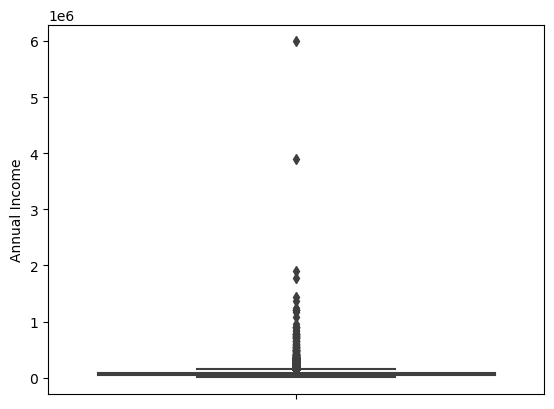

In [35]:
sns.boxplot( y=loan["annual_inc"] )
plt.ylabel('Annual Income')
plt.show()

- We could see there is a huge variation in the 50th and max of annual_inc column. The outliers that is seen clearly using box plot. We will remove those outliers.

In [36]:
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.98)]

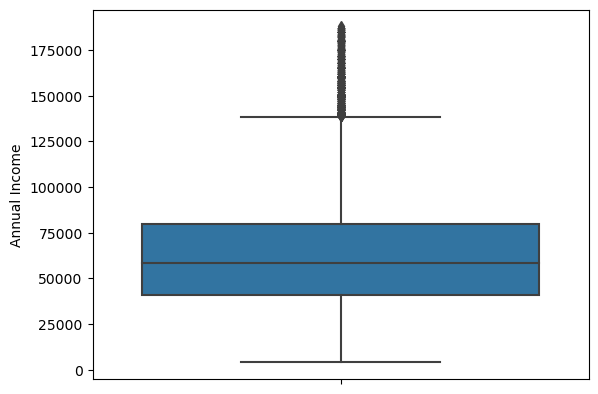

In [37]:
sns.boxplot( y=loan["annual_inc"] )
plt.ylabel('Annual Income')
plt.show()

The data has been cleaned and outliers removed, we can move ahead with the analysis.

## Case Study Data Analysis

### Univariate Analysis

#### Univariate Analysis on Loan Status

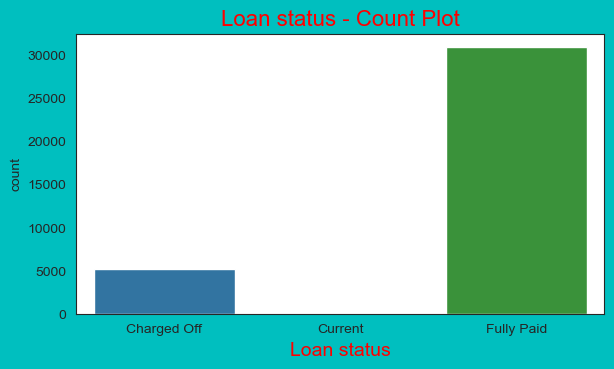

In [38]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.countplot(x='loan_status', data=loan)
ax.set_title('Loan status - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Loan status',fontsize=14,color='r')
plt.show()

***Inferences:*** Loan Status:<br> The majority of loans in the dataset are fully paid, followed by charged-off loans. This indicates that the company has a relatively low default rate.


#### Univariate Analysis on Loan Amount

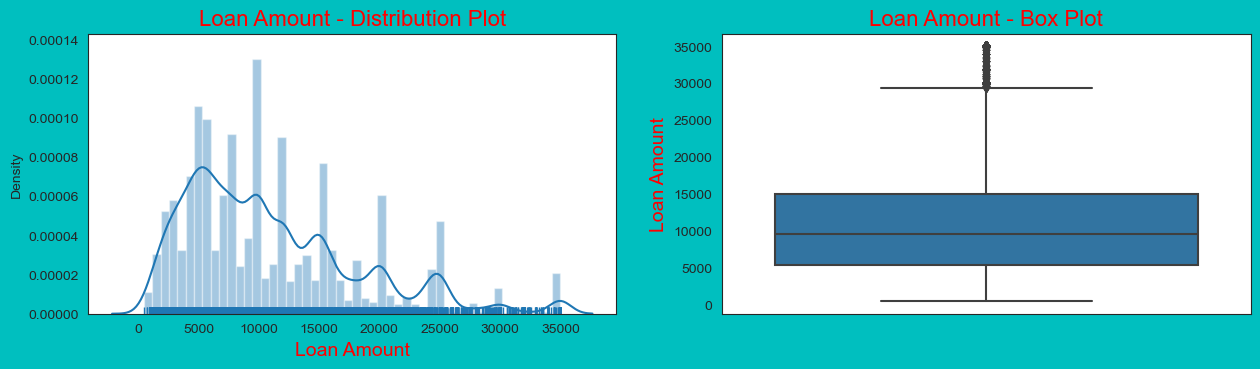

In [39]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='r')
ax.set_xlabel('Loan Amount',fontsize=14,color='r')

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='r')
ax.set_ylabel('Loan Amount',fontsize=14,color='r')
plt.show()

***Inferences:*** Loan Amount:<br> The loan amount ranges from a few thousand to a maximum of 35,000. The distribution of loan amounts is right-skewed, with a higher concentration of loans in the lower amount range. This suggests that the company primarily provides smaller loans.

#### Univariate Analysis on Loan Grade

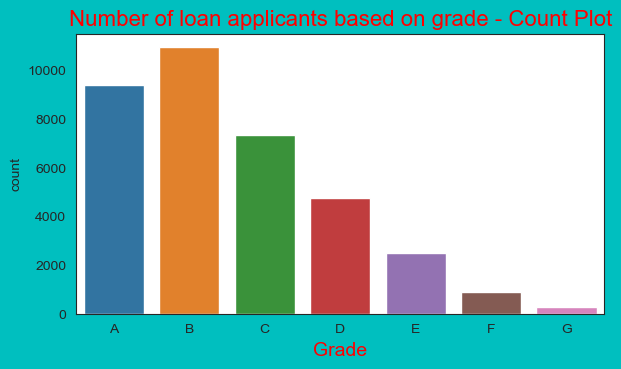

In [40]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.countplot(x='grade', data=loan)
ax.set_title('Number of loan applicants based on grade - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Grade',fontsize=14,color='r')
plt.show()

***Inferences:*** Loan Grade:<br> The loan grades range from 'A' to 'G', with 'B' being the highest grade representing lower risk. The dataset has a higher number of loans with grades 'A' and 'C', indicating that the company mostly lends to borrowers with moderate creditworthiness.

#### Univariate Analysis on Interest Rate

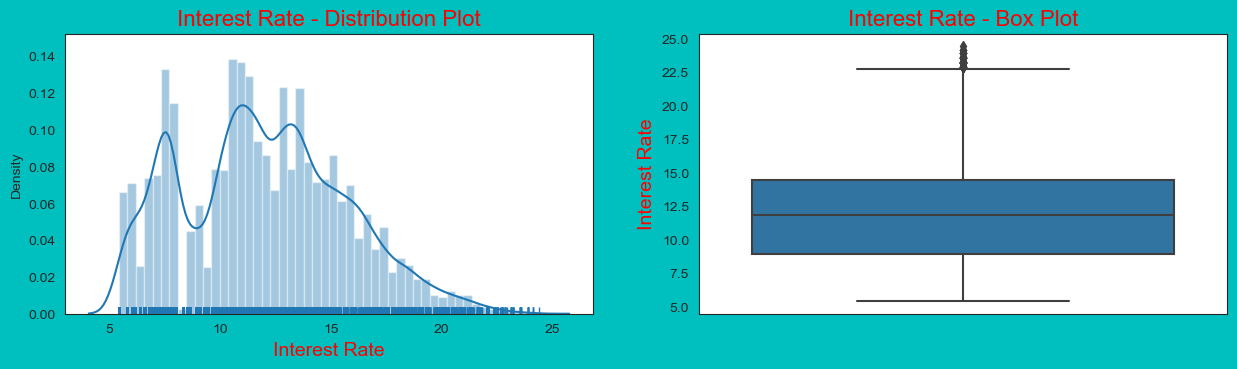

In [41]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='r')
ax.set_xlabel('Interest Rate',fontsize=14,color='r')

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color='r')
plt.show()

***Inferences:*** Interest Rate: <br>The interest rates assigned to loans range from 5% to 25%. The distribution is approximately normally distributed, with a peak around 10% to 15% interest rate. Higher interest rates are typically associated with riskier loans.

#### Univariate Analysis on Employment Length

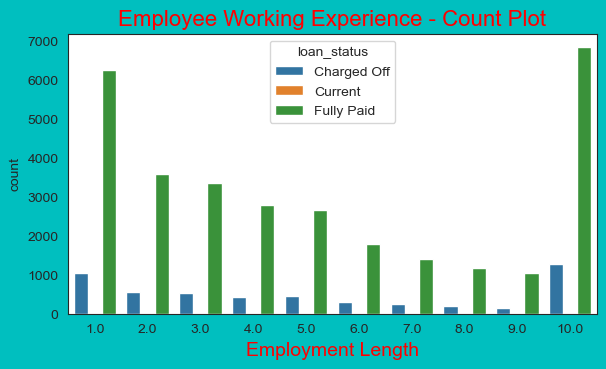

In [42]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.countplot(x='emp_length',hue='loan_status',  data=loan)
ax.set_title('Employee Working Experience - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Employment Length',fontsize=14,color='r')
plt.show()


***Inferences:*** Employment Length:<br> The length of employment of borrowers ranges from less than 1 year to over 10 years. The majority of borrowers have an employment length of more than 1 year, suggesting that the company prefers lending to individuals with stable employment.

#### Univariate Analysis on Loan Purpose

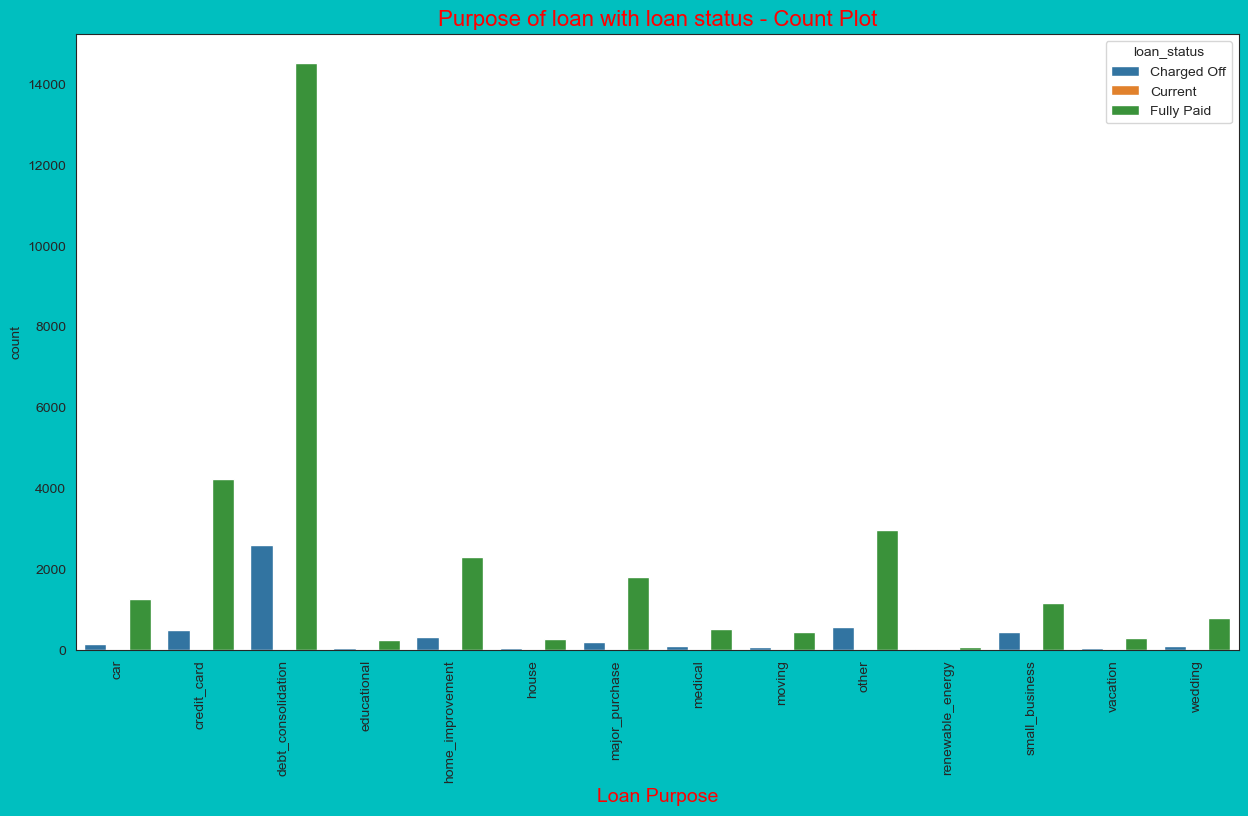

In [43]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
ax = sns.countplot(x='purpose',hue='loan_status',  data=loan)
ax.set_title('Purpose of loan with loan status - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Loan Purpose',fontsize=14,color='r')
plt.show()

***Inferences:*** Loan Purpose: <br>The dataset includes various loan purposes, such as debt consolidation, credit card refinancing, home improvement, and others. Debt consolidation is the most common loan purpose, followed by credit card refinancing. 
Maximum number of loan is lend for the purpose of debt_consolidation and it has high chance to be fully paid, it also has maximum number od Charged off compared to other purpose of loan.Less number of loan is granted to Education, Renewable energy.

#### Univariate Analysis on Loan Term

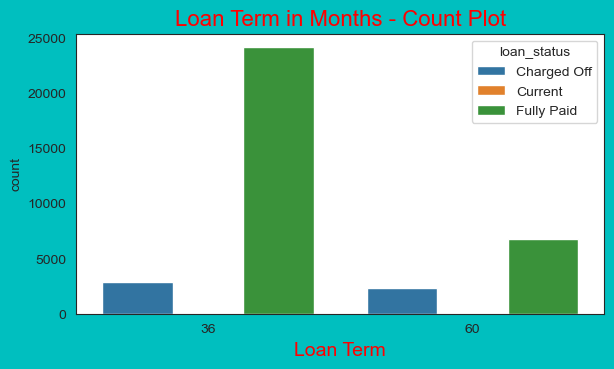

In [44]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(2, 2, 1)
ax = sns.countplot(x='term',hue='loan_status',  data=loan)
ax.set_title('Loan Term in Months - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Loan Term',fontsize=14,color='r')
plt.show()

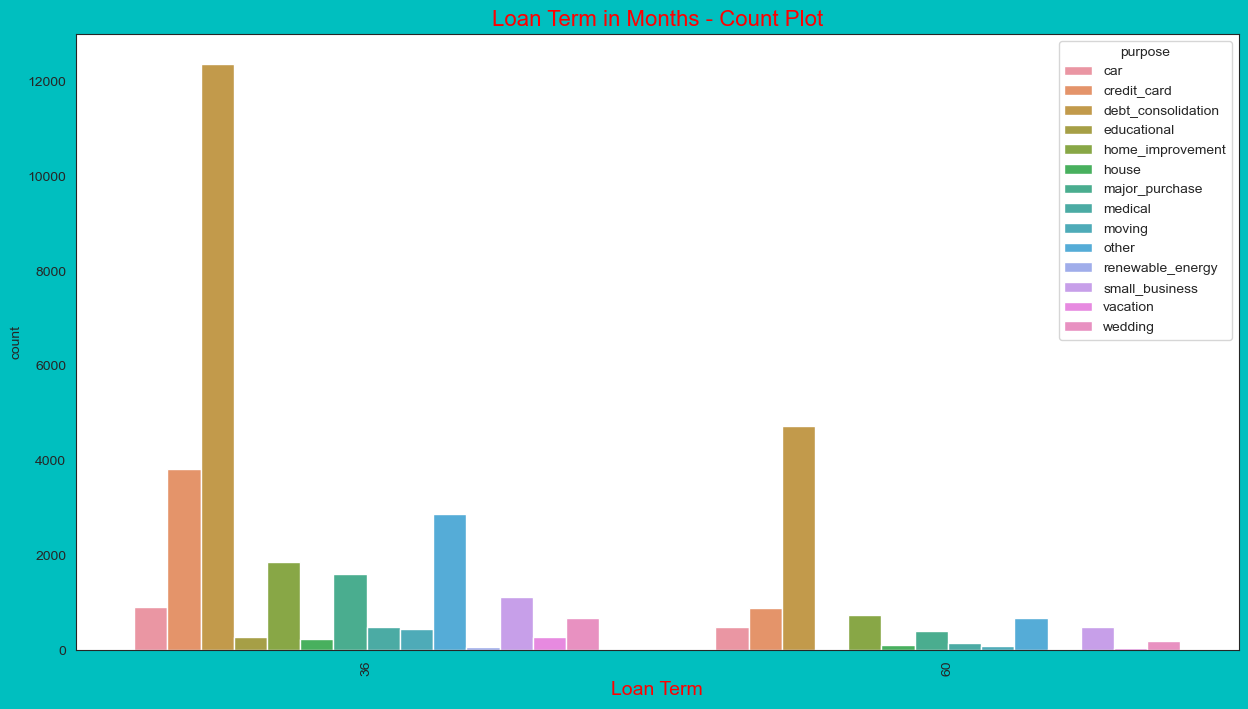

In [45]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("white")

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
ax = sns.countplot(x='term',hue='purpose',  data=loan)
ax.set_title('Loan Term in Months - Count Plot',fontsize=16,color='r')
ax.set_xlabel('Loan Term',fontsize=14,color='r')
plt.show()


***Inferences:*** Loan Term:<br> Loan is granted to applicants for all purposes either for 36 months or 60 months. debt_consolidation lead high in both the terms followed by credit_card. Most of the loan applicants are given 36 months for the loan term.

### Bivariate Analysis

#### Bivariate Analysis on Loan Status vs Loan Grade

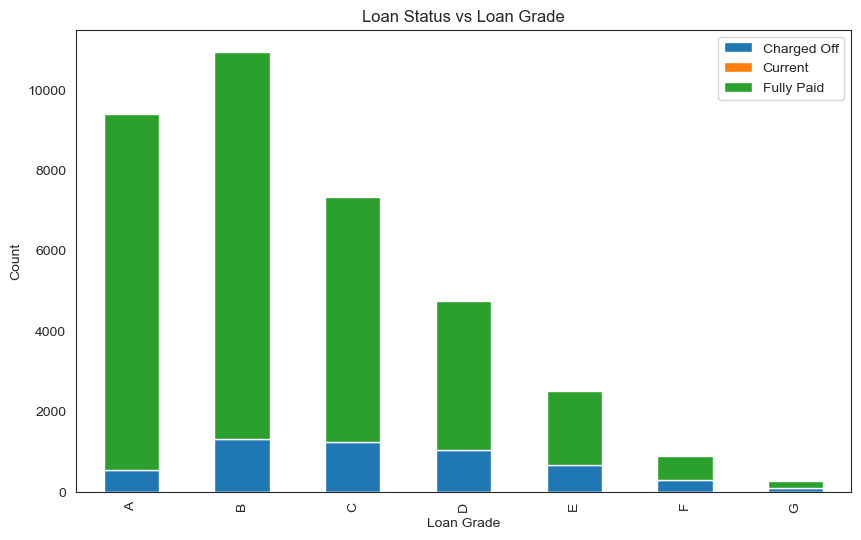

In [46]:
# Select the columns of interest
columns_of_loanstatus_grade = ['loan_status', 'grade']
data = loan[columns_of_loanstatus_grade]

# Group the data by Loan Grade and Loan Status and calculate the count
grouped_data = data.groupby(['grade', 'loan_status']).size().unstack()

# Plot the bivariate analysis
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Status vs Loan Grade')
plt.legend(loc='upper right')
plt.show()

***Inferences:***  Loan Status vs Loan Grade: <br>
There is a clear association between Loan Status and Loan Grade. Higher loan grades (such as A or B) have a higher proportion of fully paid loans, indicating lower default risk. Conversely, lower loan grades (such as E or F) have a higher proportion of charged-off loans, indicating higher default risk.

#### Bivariate Analysis on Annual income vs Chargedoff Proportion

In [47]:
inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,186,0,783,969,0.19
1,20000-40000,1391,0,6554,7945,0.18
2,40000-60000,1651,0,9176,10827,0.15
3,60000-80000,973,0,6402,7375,0.13
4,80000 +,1007,0,7987,8994,0.11


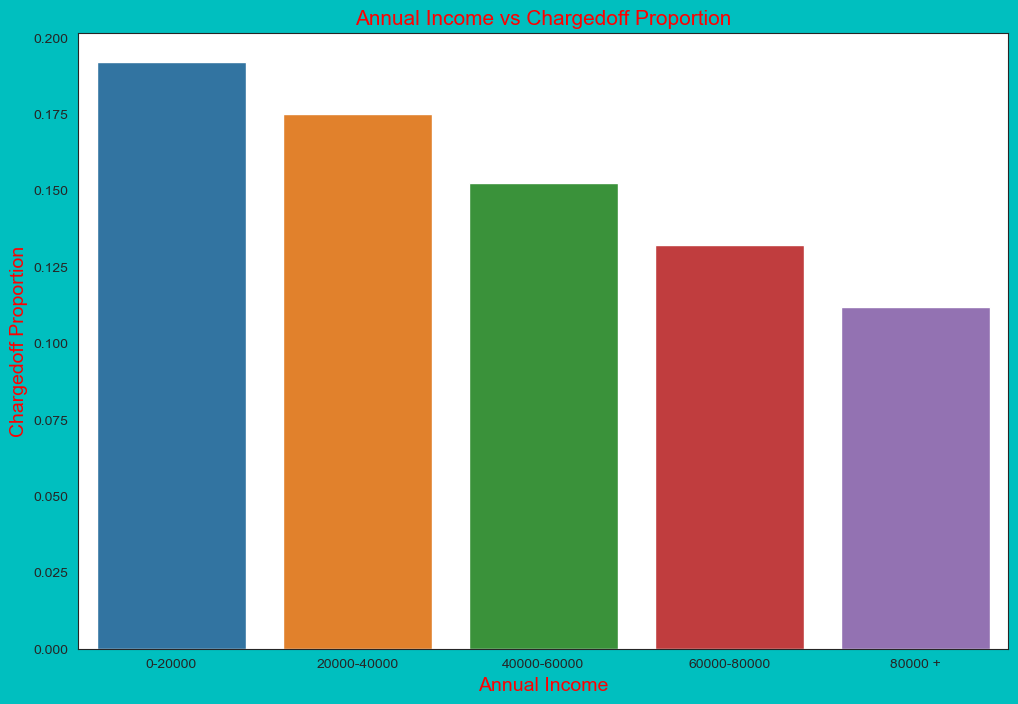

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='c')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'r')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'r')
ax1.set_xlabel('Annual Income',fontsize=14,color='r')
plt.show()

***Inferences:***  Annual income vs Chargedoff Proportion:<br>
Income range 80000+  has less chances of charged off. Income range 0-20000 has high chances of charged off. Notice that with increase in annual income charged off proportion got decreased. 

After performing the bivariate analysis between annual income and the proportion of charged-off loans, the following inferences can be made:

Higher Annual Income: Borrowers with higher annual incomes tend to have a lower proportion of charged-off loans. This suggests that higher income individuals have a better ability to repay their loans and are less likely to default.

Income Range Impact: There may be certain income ranges where the proportion of charged-off loans is relatively higher. This indicates that borrowers within these income ranges may face more financial challenges or have higher default risk compared to others.


#### Bivariate Analysis on Purprose of loan and Loan amount

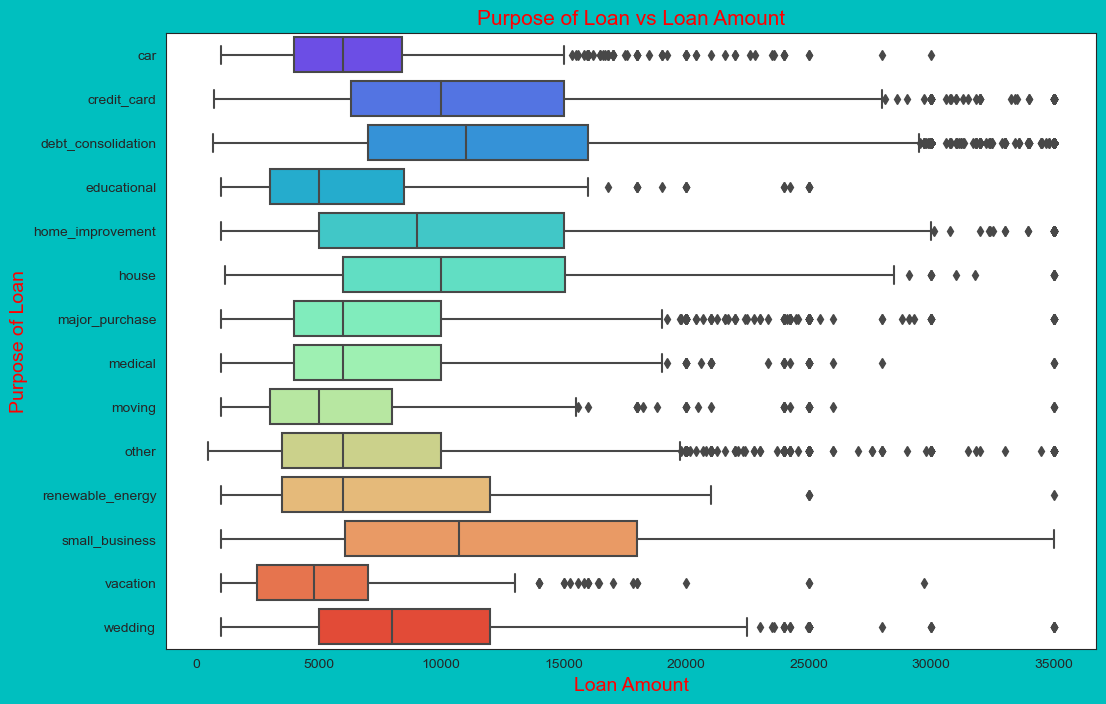

In [49]:
plt.figure(figsize=(12,8),facecolor='c')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='r')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'r')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'r')
plt.show()


Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes. Debt consolidation is second and Credit card comes 3rd.

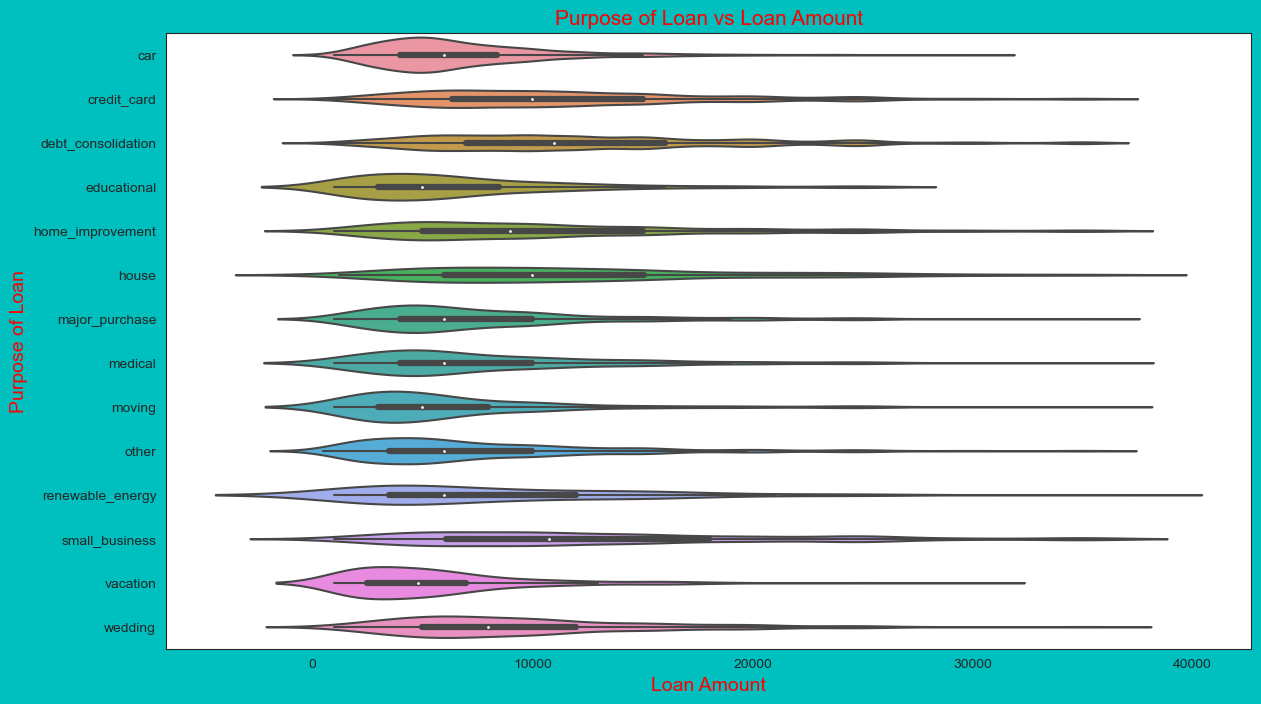

In [50]:
plt.figure(figsize=(14,8),facecolor='c')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='r')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'r')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'r')
plt.show()

***Inferences:***  Purpose of the loan and Loan amount:<br>
After conducting the bivariate analysis between the Purpose of the loan and Loan amount, the following inferences can be made:

Loan Amount Variation: The purpose of the loan has a significant impact on the loan amount. Certain loan purposes tend to have higher average loan amounts, indicating a greater financial need or investment value associated with those purposes.

Major Loan Purposes: The most common loan purposes tend to be debt consolidation, credit card refinancing, home improvement, and major purchases. These purposes often require higher loan amounts due to the nature of the expenses involved.

Risk Assessment: The purpose of the loan can provide insights into the risk associated with the loan amount. For example, loans for small businesses or debt consolidation may have higher default risk compared to loans for home improvement or education. Lenders should consider the purpose of the loan as an important factor in assessing the creditworthiness and repayment capacity of borrowers.

#### Bivariate Analysis on Loan Amount and Interest Rate

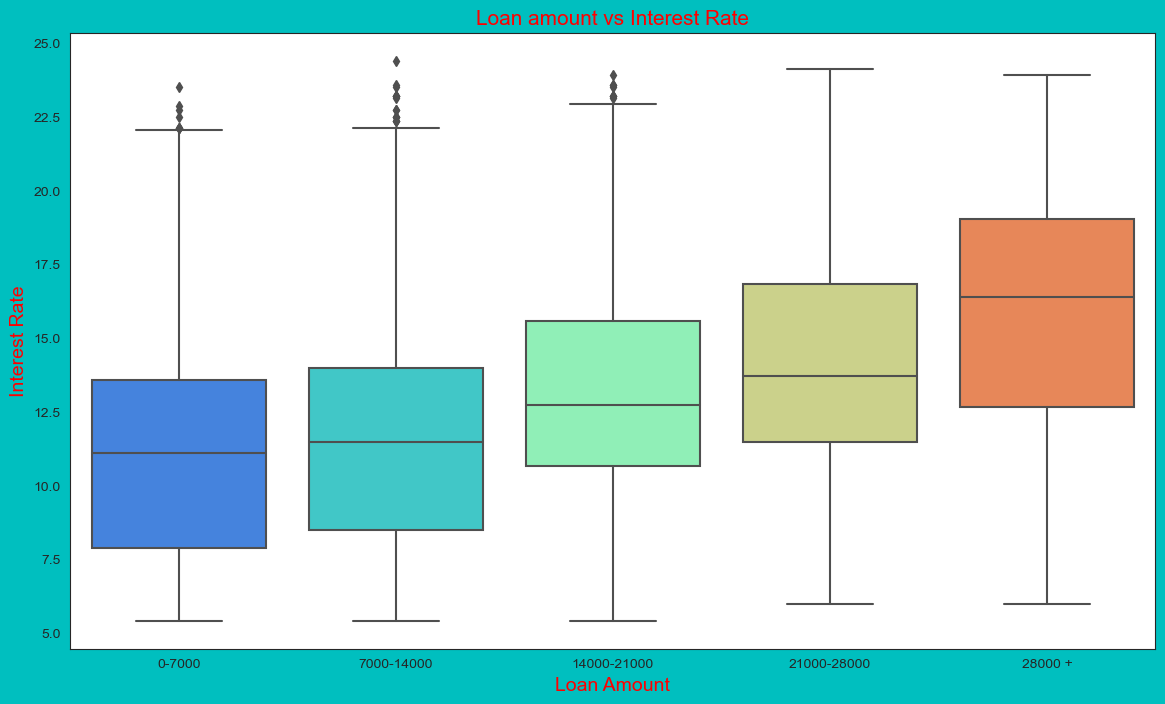

In [51]:
plt.figure(figsize=(14,8),facecolor='c')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'r')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'r')
plt.show()

***Inferences:***  Loan Amount and Interest Rate:<br>
After conducting the bivariate analysis between Loan Amount and Interest Rate, the following inferences can be made:

Positive Relationship: There is a positive relationship between Loan Amount and Interest Rate. As the loan amount increases, the interest rate tends to be higher. This suggests that lenders may charge higher interest rates for larger loan amounts to compensate for the increased risk associated with larger loans.

Risk Assessment: Loan Amount and Interest Rate can serve as indicators of the borrower's creditworthiness and risk profile. Higher loan amounts may indicate a greater need for funds or higher financial commitments, which could lead to a higher default risk.

#### Bivariate Analysis on DTI and Interest Rate

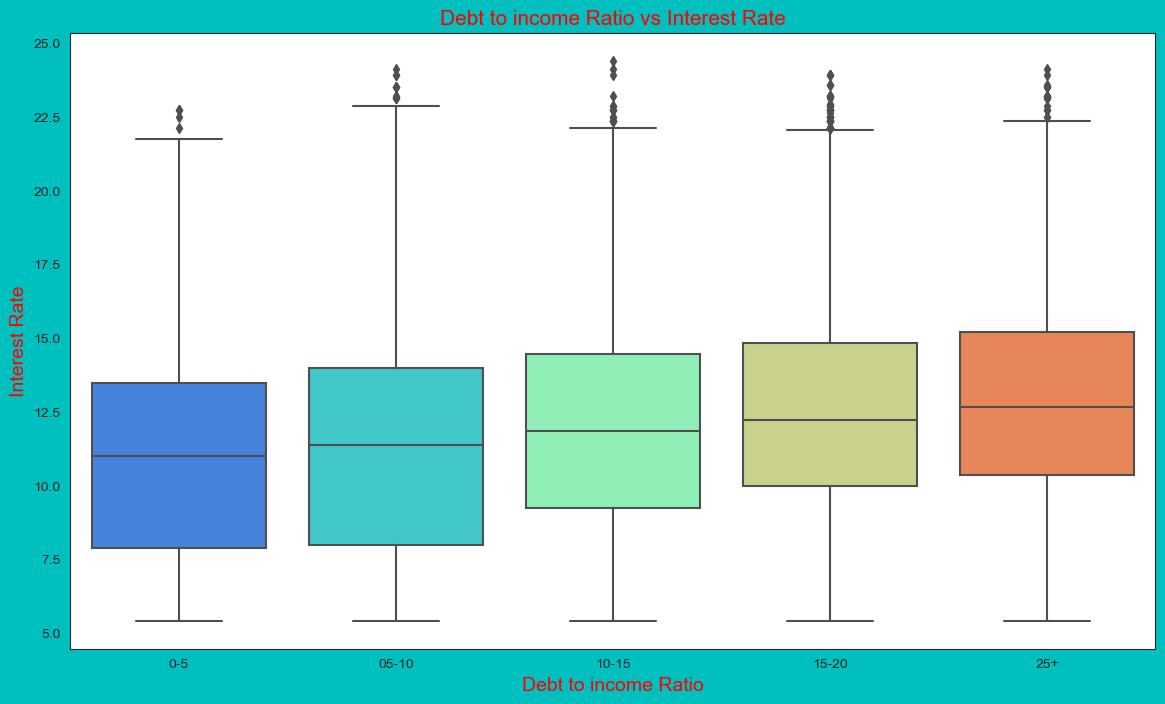

In [52]:
plt.figure(figsize=(14,8),facecolor='c')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'r')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'r')
plt.show()

***Inferences:***  DTI and Interest Rate:<br>
After conducting the bivariate analysis between Debt-to-Income (DTI) ratio and Interest Rate, the following inferences can be made:

Impact on Interest Rate: There is a positive relationship between the DTI ratio and the Interest Rate. As the DTI ratio increases, the Interest Rate tends to be higher. This suggests that borrowers with higher DTI ratios, indicating a higher level of debt relative to income, are perceived as higher risk borrowers by lenders, resulting in higher interest rates.

Risk Assessment: The DTI ratio is an important factor in assessing the borrower's ability to repay the loan. A higher DTI ratio indicates a higher level of debt obligations, which may impact the borrower's financial stability and ability to make timely loan repayments. Lenders may charge higher interest rates to compensate for the increased risk associated with borrowers with higher DTI ratios.

Creditworthiness: The DTI ratio is often considered as an indicator of the borrower's creditworthiness. Lenders assess the borrower's ability to manage their existing debt obligations in relation to their income. A higher DTI ratio may signal a higher risk of default and may result in a higher interest rate being charged.

Loan Affordability: The relationship between DTI ratio and Interest Rate also affects the affordability of the loan for borrowers. Higher interest rates on loans with higher DTI ratios can increase the monthly loan payment burden for borrowers, making it more challenging to manage their overall debt obligations.

#### Bivariate Analysis on Grade and Interest Rate

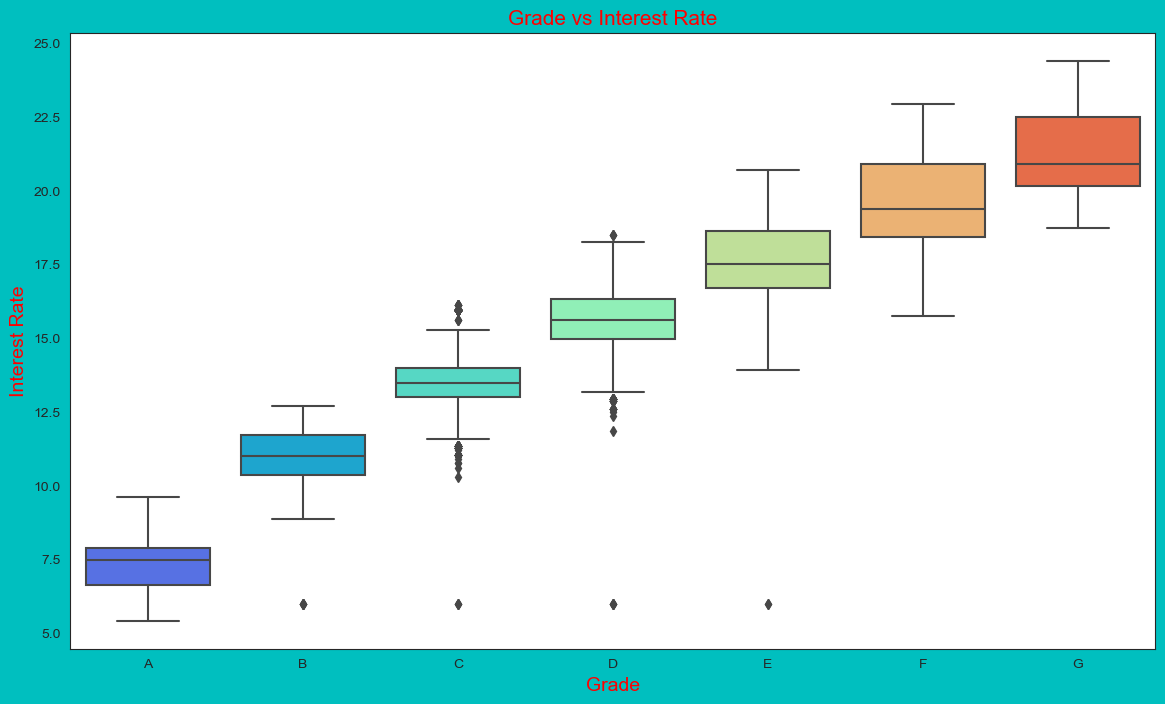

In [53]:
plt.figure(figsize=(14,8),facecolor='c')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'r')
ax.set_xlabel('Grade',fontsize=14,color = 'r')
plt.show()

***Inferences:***  Grade and Interest Rate:<br>
After conducting the bivariate analysis between Grade and Interest Rate, the following inferences can be made:

Relationship between Grade and Interest Rate: There is a clear relationship between the loan Grade and the Interest Rate. Higher-grade loans (e.g., A, B) tend to have lower Interest Rates, while lower-grade loans (e.g., E, F) have higher Interest Rates. This suggests that the loan Grade is a significant factor considered by lenders in determining the Interest Rate for borrowers.

Creditworthiness and Risk Assessment: The Grade assigned to a loan reflects the borrower's creditworthiness and the level of risk associated with the loan. Higher-grade loans are typically assigned to borrowers with a strong credit history, low default risk, and good repayment capacity. Lenders offer lower Interest Rates to these borrowers as they are considered less likely to default.

Default Risk: Lower-grade loans are associated with higher default risk. Lenders compensate for this increased risk by charging higher Interest Rates to protect their investment. Higher Interest Rates on lower-grade loans act as a risk premium to cover potential losses in case of default.

#### Bivariate Analysis on Purpose and Interest Rate

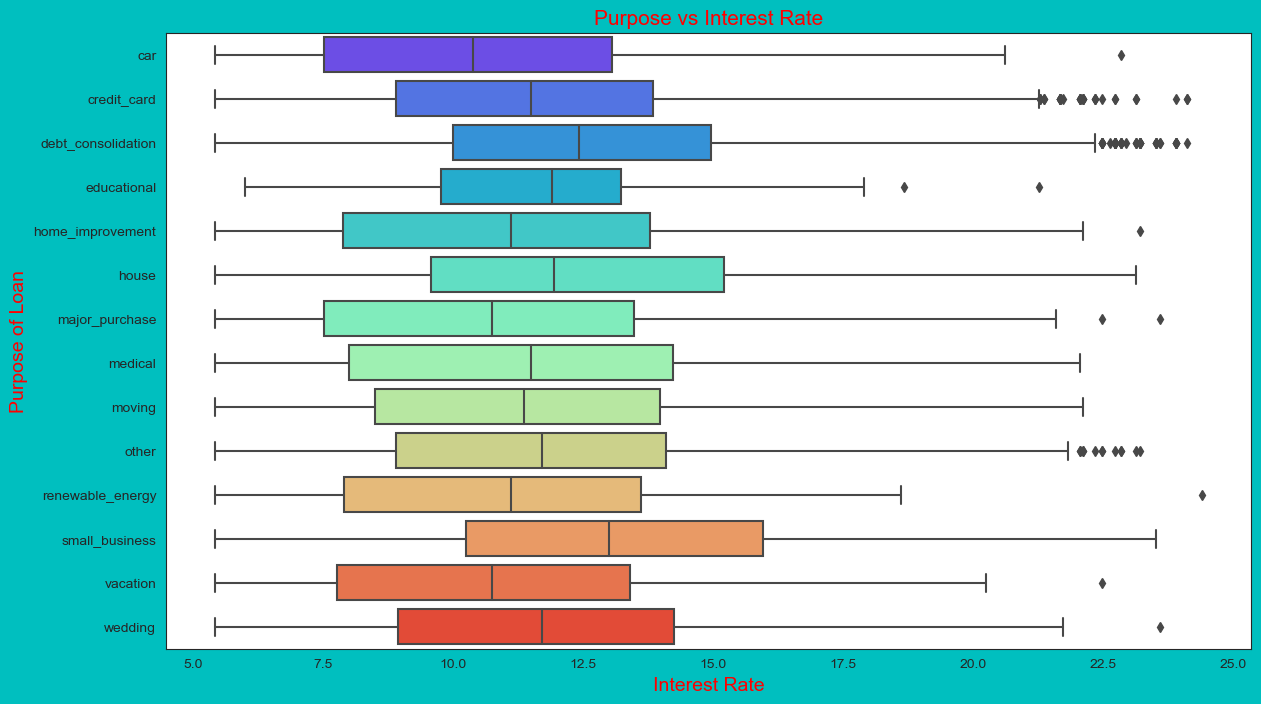

In [54]:
plt.figure(figsize=(14,8),facecolor='c')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='r')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'r')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'r')
plt.show()

***Inferences:***  Purpose and Interest Rate:<br>
After conducting the bivariate analysis between Purpose and Interest Rate, the following inferences can be made:

Variation in Interest Rates: The purpose of the loan has an impact on the interest rate charged. Different loan purposes are associated with different interest rates. Some loan purposes may have higher interest rates, indicating higher risk or complexity, while others may have lower interest rates, indicating lower risk or lower financial obligations.

Risk Assessment: The purpose of the loan provides insights into the borrower's intended use of the funds and their financial situation. Lenders assess the risk associated with each loan purpose and adjust the interest rate accordingly. Higher-risk loan purposes may be charged higher interest rates to compensate for the increased likelihood of default.

### Bivariate Analysis on Recoveries and Annual income

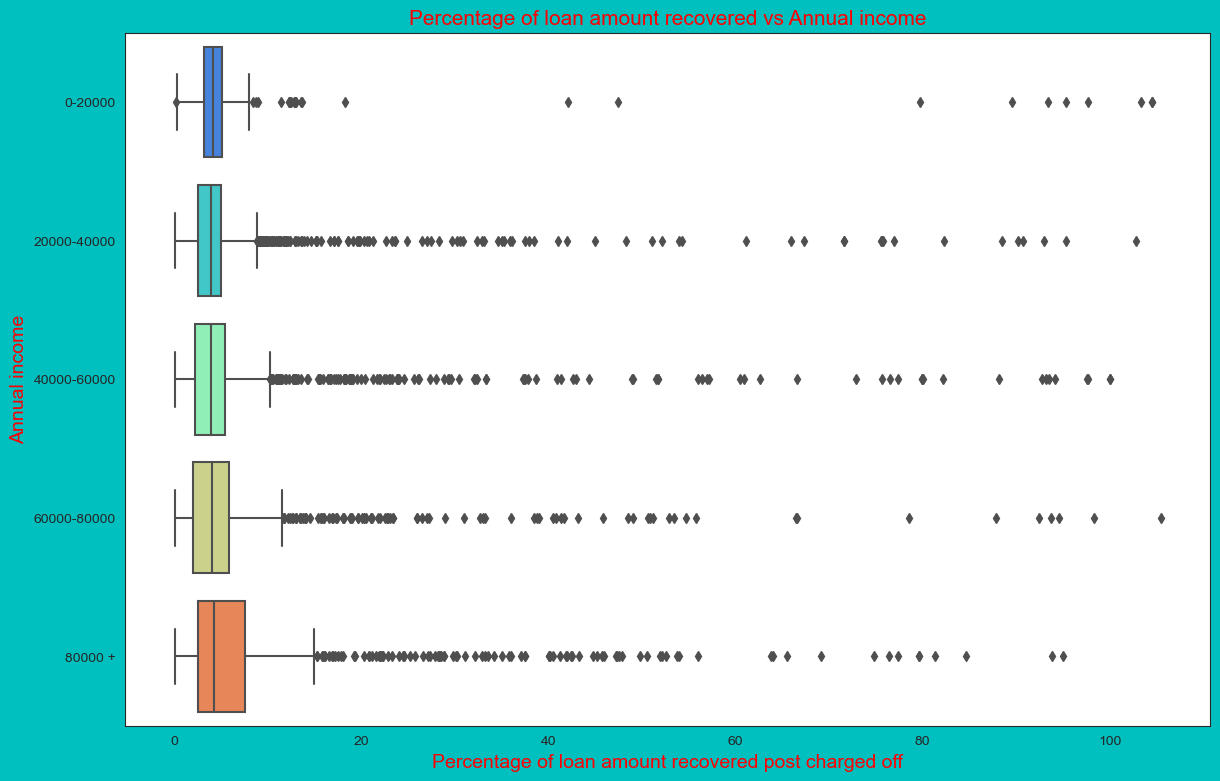

In [55]:
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='c')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'r')
ax.set_ylabel('Annual income',fontsize=14,color = 'r')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'r')
plt.show()

***Inferences:***  Recoveries and Annual income:<br>
Higher percentage of loan amount is recovered when annual income is high. Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

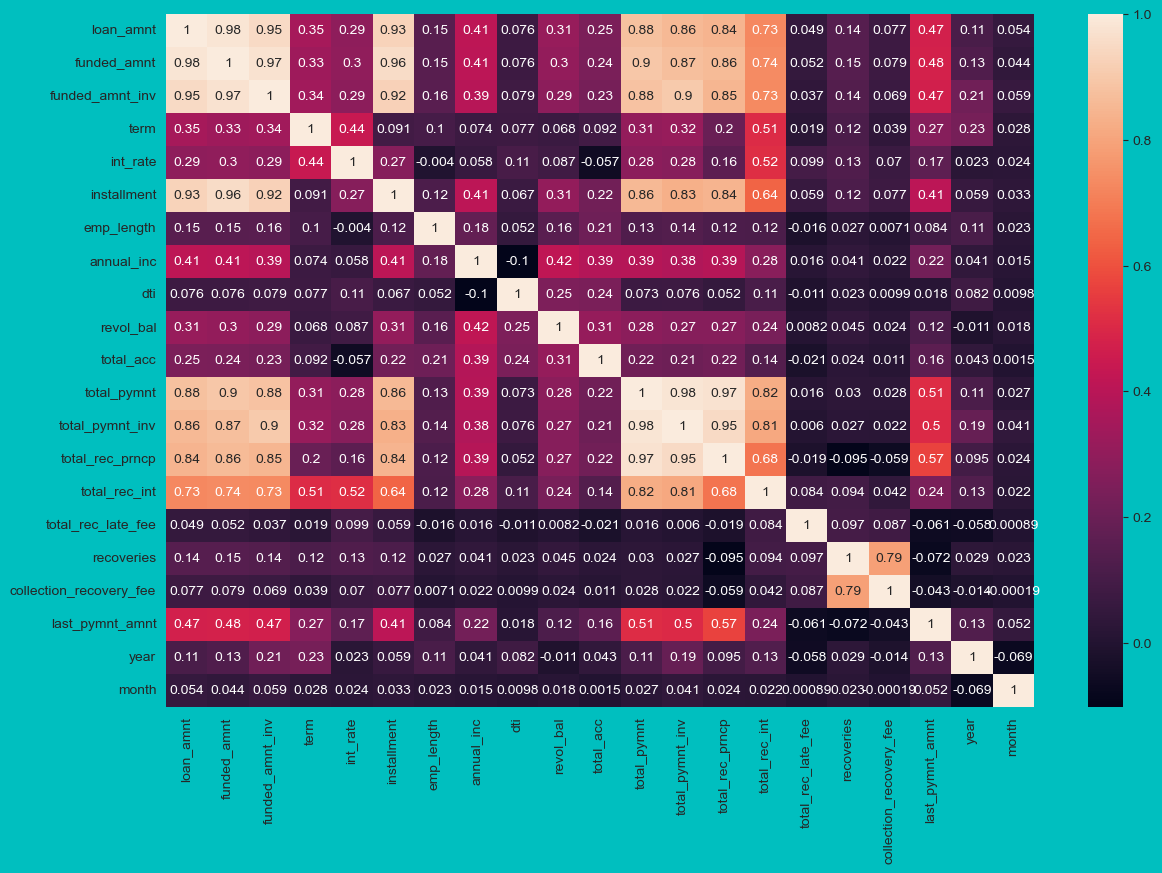

In [56]:
# Heatmap of correlation between variables
plt.figure(figsize=(14,9),facecolor='c')
sns.heatmap(loan.corr(),annot=True)
plt.show()